C:\Users\admin\AppData\Local\Temp\ipykernel_6960\1222442027.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['revenue'].resample('M').sum()
C:\Users\admin\AppData\Local\Temp\ipykernel_6960\1222442027.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


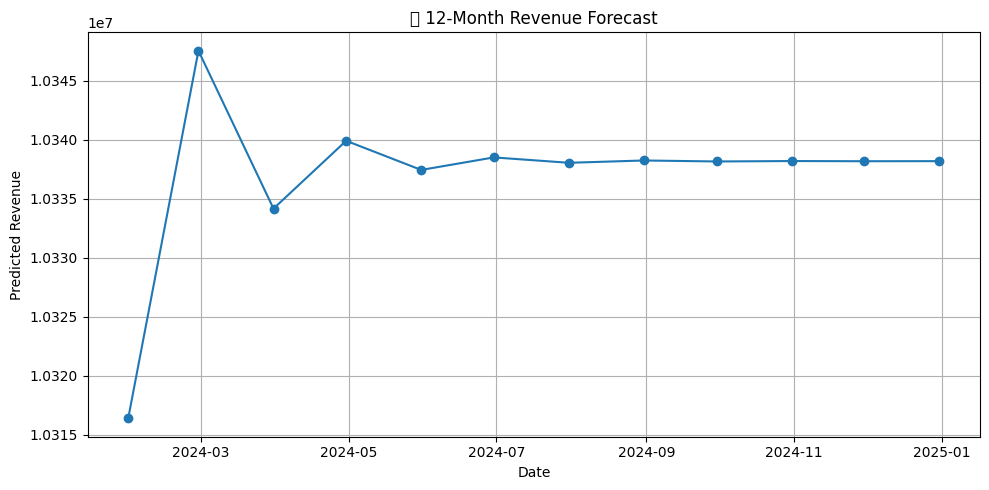

In [6]:
# 04_model_building_ARIMA.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pickle

df = pd.read_csv('../data/cleaned_sales_data.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

monthly = df['revenue'].resample('M').sum()

# Build ARIMA
model = ARIMA(monthly, order=(1,1,1))
results = model.fit()

# Save model
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(results, f)

# Forecast next 12 months

forecast = results.forecast(12)

# Plot with labels
plt.figure(figsize=(10, 5))
plt.plot(forecast, marker='o')
plt.title('📈 12-Month Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()
